In [1]:
#Construye una tabla de unidades de frío acumuladas UF24 por cada día completo de datos del periodo de tiempo analizado, diseñando un algoritmo en Python para contabilizar las horas frío de acuerdo al modelo de Utah de Richardson.
#Agrega dos columnas nuevas con las temperaturas Mínima y Máximas diarias del periodo de tiempo analizado.
#Construye una gráfica con Matplotlib, mostrando la evolución de las temperaturas mínima y máxima en la misma gráfica.  
#Construye una gráfica con Matplotlib, donde se grafique la acumulación de horas frío desde el primer día (suma de UF24).

In [2]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Creamos un dataframe para nuetros datos.
df0 = pd.read_csv('vid18_180219.dat', sep=',')
df0.head()

,TIMESTAMP,RECORD,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result2_Avg,Result3_Avg,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego_mm_Tot,Perco_mm_Tot
0,2018-05-11 20:10:00,7980,12.31,25.87,-5.499501,1.581859,-82.19471,-4.002829,23.26391,296.4139,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
1,2018-05-11 20:20:00,7981,12.30,25.37,-4.934265,1.946161,-80.00718,-1.978131,22.75189,295.9019,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
2,2018-05-11 20:30:00,7982,12.28,24.91,-4.615617,2.407313,-76.72183,-1.868207,22.43361,295.5836,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.46,0.0,0
3,2018-05-11 20:40:00,7983,12.27,24.47,-4.433317,2.523456,-73.10189,-3.367143,22.08901,295.2390,...,0.04,26.4,79.5,0.041,14.71,14.75,15.09,14.45,0.0,0
4,2018-05-11 20:50:00,7984,12.26,24.09,-2.861873,3.898805,-70.19295,0.915511,22.08449,295.2345,...,0.04,26.4,79.5,0.041,14.70,14.76,15.08,14.46,0.0,0


In [4]:
#Creamos un DataFrame que únicamente me contenga a los únicos datos que nos interesan
#Nos interesan sólo: TIMESTAMP (Fecha) y  AirTC_Avg (Temperatura del aire, ºC).
df=pd.DataFrame({"Fecha": df0.TIMESTAMP, "Temperatura": df0.AirTC_Avg})
df.head()

,Fecha,Temperatura
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [5]:
df.iloc[[24935]]

,Fecha,Temperatura
24935,2018-11-01 00:00:00,9.13


In [6]:
#Creo un dataframe en el cual 
df1=pd.DataFrame({"Fecha":df.Fecha[df.index>=24935],"Temp":df.Temperatura[df.index>=24935]})
df1.index=np.arange(0,len(df1))
df1.head()

,Fecha,Temp
0,2018-11-01 00:00:00,9.13
1,2018-11-01 00:10:00,8.89
2,2018-11-01 00:20:00,8.66
3,2018-11-01 00:30:00,8.52
4,2018-11-01 00:40:00,8.47


In [7]:
#Haciendo que mi columna fechas las reconozca como fechas.
df1['Fechas'] = pd.to_datetime(df1.apply(lambda x: x['Fecha'], 1), dayfirst=True)
df1 = df1.drop(['Fecha'], 1)

In [8]:
#Creando una columna para los años
df1['Año']=df1['Fechas'].dt.year
df1.head()
#Creando una columna para los mess
df1['Mes']=df1['Fechas'].dt.month
df1.head()
#Crando una columna para los días
df1['Día']=df1['Fechas'].dt.day
df1.head()
#Creando una columna para las horas
df1['Hora']=df1['Fechas'].dt.hour
df1.head()
#Creando una columna para los minutos
df1['Min']=df1['Fechas'].dt.minute
df1.head()

,Temp,Fechas,Año,Mes,Día,Hora,Min
0,9.13,2018-11-01 00:00:00,2018,11,1,0,0
1,8.89,2018-11-01 00:10:00,2018,11,1,0,10
2,8.66,2018-11-01 00:20:00,2018,11,1,0,20
3,8.52,2018-11-01 00:30:00,2018,11,1,0,30
4,8.47,2018-11-01 00:40:00,2018,11,1,0,40


In [9]:
#1.-Construye una tabla de unidades de frío acumuladas UF24 por cada día completo de datos del periodo de tiempo analizado,
#diseñando un algoritmo en Python para contabilizar las horas frío de acuerdo al modelo de Utah de Richardson.

In [10]:
#Número de horas de frío en un día (El frío de acuerdo al modelo de Utah Richardson)

In [11]:
df1['tphora']=df1.groupby(['Año','Mes','Día','Hora'])['Temp'].transform('mean')
df1.head()

,Temp,Fechas,Año,Mes,Día,Hora,Min,tphora
0,9.13,2018-11-01 00:00:00,2018,11,1,0,0,8.708333
1,8.89,2018-11-01 00:10:00,2018,11,1,0,10,8.708333
2,8.66,2018-11-01 00:20:00,2018,11,1,0,20,8.708333
3,8.52,2018-11-01 00:30:00,2018,11,1,0,30,8.708333
4,8.47,2018-11-01 00:40:00,2018,11,1,0,40,8.708333


In [12]:
df2=pd.DataFrame({"Fecha":df1[df1.Min==0].Fechas,"tphora":df1[df1.Min==0].tphora,"Hora":df1[df1.Min==0].Hora,"Día":df1[df1.Min==0].Día,"Mes":df1[df1.Min==0].Mes,"Año":df1[df1.Min==0].Año})
df2.index=np.arange(0,len(df1)/6)
df2.head()


,Año,Día,Fecha,Hora,Mes,tphora
0.0,2018,1,2018-11-01 00:00:00,0,11,8.708333
1.0,2018,1,2018-11-01 01:00:00,1,11,8.493333
2.0,2018,1,2018-11-01 02:00:00,2,11,8.690000
3.0,2018,1,2018-11-01 03:00:00,3,11,8.846667
4.0,2018,1,2018-11-01 04:00:00,4,11,7.397500


In [13]:
#Variable que almacenará el valor, se le da un valor aleatorio para poder recetear
n=-7
#Aquí se almancenará finalmente, es un arreglo, no se le da valor inicial. 
nhora=[]

#Creamos un loopque vaya almacenando el valor que sele asigna a la hora promedio conlascondiciones UTAH
for i in range(0,len(df2.tphora)):
    if(df2["tphora"][i]<=1.5):
        n=0
    elif(df2["tphora"][i]>1.5 and df2["tphora"][i]<=2.5):
        n=0.5
    elif(df2["tphora"][i]>2.5 and df2["tphora"][i]<=9.2):
        n=1
    elif(df2["tphora"][i]>9.2 and df2["tphora"][i]<=12.5):
        n=0.5
    elif(df2["tphora"][i]>12.5 and df2["tphora"][i]<=16):
        n=0
    elif(df2["tphora"][i]>16 and df2["tphora"][i]<=18):
        n=-0.5
    elif(df2["tphora"][i]>=18):
        n=-1
#Le damos a nhora el valor de n
    nhora.append(n)
#Le volvemos a darel valor de-7 para resetear y volver a empezar el loop 
    n=-7
#Creamos una columna con nuestros valores obtenidos en nuestros data frame 
df2["nhora"]=nhora
#Mostramos los primeros 5 valores
df2.head()

,Año,Día,Fecha,Hora,Mes,tphora,nhora
0.0,2018,1,2018-11-01 00:00:00,0,11,8.708333,1.0
1.0,2018,1,2018-11-01 01:00:00,1,11,8.493333,1.0
2.0,2018,1,2018-11-01 02:00:00,2,11,8.690000,1.0
3.0,2018,1,2018-11-01 03:00:00,3,11,8.846667,1.0
4.0,2018,1,2018-11-01 04:00:00,4,11,7.397500,1.0


In [14]:
#Sumamos todos los valores de las hora contabilizadas sobre el nhoracon un group.by

df2["ndía"]=df2.groupby(["Año","Mes","Día"])["nhora"].transform("sum")

#Mostramos los primeros 5 valores de nuestra nueva tabla
df2.head()

,Año,Día,Fecha,Hora,Mes,tphora,nhora,ndía
0.0,2018,1,2018-11-01 00:00:00,0,11,8.708333,1.0,-0.5
1.0,2018,1,2018-11-01 01:00:00,1,11,8.493333,1.0,-0.5
2.0,2018,1,2018-11-01 02:00:00,2,11,8.690000,1.0,-0.5
3.0,2018,1,2018-11-01 03:00:00,3,11,8.846667,1.0,-0.5
4.0,2018,1,2018-11-01 04:00:00,4,11,7.397500,1.0,-0.5


In [15]:
#2.-Agrega dos columnas nuevas con las temperaturas Mínima y Máximas diarias del periodo de tiempo analizado.

In [16]:

df2["TempMin"]=df2.groupby(["Año","Mes","Día"])["tphora"].transform("max")
df2["TempMax"]=df2.groupby(["Año","Mes","Día"])["tphora"].transform("min")

df2.head()

,Año,Día,Fecha,Hora,Mes,tphora,nhora,ndía,TempMin,TempMax
0.0,2018,1,2018-11-01 00:00:00,0,11,8.708333,1.0,-0.5,28.621667,6.806833
1.0,2018,1,2018-11-01 01:00:00,1,11,8.493333,1.0,-0.5,28.621667,6.806833
2.0,2018,1,2018-11-01 02:00:00,2,11,8.690000,1.0,-0.5,28.621667,6.806833
3.0,2018,1,2018-11-01 03:00:00,3,11,8.846667,1.0,-0.5,28.621667,6.806833
4.0,2018,1,2018-11-01 04:00:00,4,11,7.397500,1.0,-0.5,28.621667,6.806833


In [17]:
#3.-Construye una gráfica con Matplotlib, mostrando la evolución de las temperaturas mínima y máxima en la misma gráfica.  

In [30]:
#Hacemos que los valores no se repitan tanto debido a todas las horas en un día, por lo tanto tomamos solo el de la hora=0 
df3=pd.DataFrame({"TempMin":df2[df2.Hora==0].TempMin,"TempMax":df2[df2.Hora==0].TempMax,"Día":df2[df2.Hora==0].Día,"Fecha":df2[df2.Hora==0].Fecha,"ndía":df2[df2.Hora==0].ndía})
#Le asignamos el indice desde cero hasta la longitud de nuestro dataframe original entre 24(Por que quitamos los valores)
df3.index=np.arange(0,len(df2)/24)
#Mostramos los valores 
df3.head()

,Día,Fecha,TempMax,TempMin,ndía
0.0,1,2018-11-01,6.806833,28.621667,-0.5
1.0,2,2018-11-02,10.248333,30.960000,-9.0
2.0,3,2018-11-03,10.473333,29.998333,-9.0
3.0,4,2018-11-04,11.670000,31.243333,-11.5
4.0,5,2018-11-05,11.435000,31.093333,-8.0


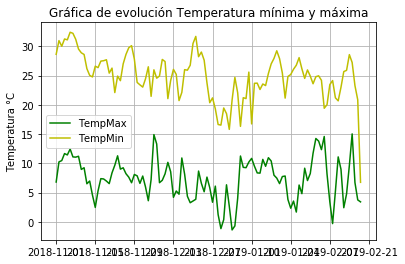

In [24]:
#Graficamos la la tabla de evolución de temperaturas
#Ejes
plt.plot_date(x=df3.Fecha, y=df3.TempMax, fmt="g")
plt.plot_date(x=df3.Fecha, y=df3.TempMin, fmt="y")
plt.legend(loc='best')
#Título
plt.title("Gráfica de evolución Temperatura mínima y máxima")
plt.ylabel("Temperatura °C")
plt.grid(True)
#Guardamos la figura
plt.savefig('GrafTemp3', plt=2000)
plt.show()

In [23]:
#4.-Construye una gráfica con Matplotlib, donde se grafique la acumulación de horas frío desde el primer día (suma de UF24). 
 

In [40]:
#Creamos una variable acum que será una variable comodin
acum=0
#Acundía será el arreglo donde se arreglo donde se guardará la acumulación de los datos
acundía=[]

#Creamos un bucle para que los datos puedan irse sumando 
for i in range(0,len(df3.ndía)):
    acum=df3["ndía"][i]+acum
#Agendamos los valores de acum en acundía 
    acundía.append(acum)
    
#Creamos un Data frame donde tengamos nuestro valor de acumulación 
df4=pd.DataFrame({"Fecha": df3.Fecha, "AcumHoras":acundía})

#Mostramos los primeros valores
df4.head()


,AcumHoras,Fecha
0.0,-0.5,2018-11-01
1.0,-9.5,2018-11-02
2.0,-18.5,2018-11-03
3.0,-30.0,2018-11-04
4.0,-38.0,2018-11-05


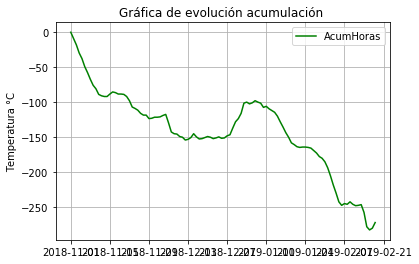

In [43]:
#Graficamos la la tabla de acumulación
#Ejes
plt.plot_date(x=df4.Fecha, y=df4.AcumHoras, fmt="g")
plt.legend(loc='best')
#Título
plt.title("Gráfica de evolución acumulación ")
plt.ylabel("Temperatura °C")
plt.grid(True)
#Guardamos la figura
plt.savefig('GrafTemp3', plt=2000)
plt.show()